# Data Collection

In [125]:
!pip install kaggle

Use DATA_DIR wherever needed for loading, saving, or moving files.

In [126]:
import os

# Set root directory
ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Set standard data directory
DATA_DIR = os.path.join(ROOT_DIR, 'weather_data')


In [127]:
import os
import shutil

csv_files = [
    'bengaluru.csv',
    'bombay.csv',
    'delhi.csv',
    'hyderabad.csv',
    'jaipur.csv',
    'kanpur.csv',
    'nagpur.csv',
    'pune.csv',
]

# Get the path to the root directory (one level above notebook/)
root_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Full path to the weather_data folder at root level
folder_path = os.path.join(root_dir, 'weather_data')

# Create the folder if it doesn't exist
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Folder 'weather_data' created at '{folder_path}'.")
else:
    print(f"Folder 'weather_data' already exists at '{folder_path}'.")

# Move each CSV file from root to weather_data
for csv_file in csv_files:
    source_path = os.path.join(root_dir, csv_file)
    destination_path = os.path.join(folder_path, csv_file)
    try:
        shutil.move(source_path, destination_path)
        print(f"Moved '{csv_file}' to '{folder_path}'.")
    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found in the root directory.")
    except Exception as e:
        print(f"An error occurred while moving '{csv_file}': {e}")

print("All specified CSV files have been moved to the 'weather_data' folder.")


Folder 'weather_data' already exists at 'c:\Users\deepa\OneDrive\Programming\Projects\GitHub\Self_Updating-_Weather_forecast_System\weather_data'.
Error: File 'bengaluru.csv' not found in the root directory.
Error: File 'bombay.csv' not found in the root directory.
Error: File 'delhi.csv' not found in the root directory.
Error: File 'hyderabad.csv' not found in the root directory.
Error: File 'jaipur.csv' not found in the root directory.
Error: File 'kanpur.csv' not found in the root directory.
Error: File 'nagpur.csv' not found in the root directory.
Error: File 'pune.csv' not found in the root directory.
All specified CSV files have been moved to the 'weather_data' folder.


Importing data from kaggle

In [128]:
# Since we are using Indian cities data this model is more accurate for Indian scenarios
!kaggle datasets download -d hiteshsoneji/historical-weather-data-for-indian-cities

Dataset URL: https://www.kaggle.com/datasets/hiteshsoneji/historical-weather-data-for-indian-cities
License(s): other
historical-weather-data-for-indian-cities.zip: Skipping, found more recently modified local copy (use --force to force download)


Extracting the compressed dataset

In [129]:
from zipfile import ZipFile
import os

data = 'historical-weather-data-for-indian-cities.zip'

# Get the absolute path to the root weather_data folder
root_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
weather_data_path = os.path.join(root_dir, 'weather_data')

# Ensure the weather_data folder exists
if not os.path.exists(weather_data_path):
    os.makedirs(weather_data_path)

# Extract the zip file to root/weather_data/
with ZipFile(data, 'r') as zip_ref:
    zip_ref.extractall(weather_data_path)
    print(f"Files successfully extracted to {weather_data_path}")


Files successfully extracted to c:\Users\deepa\OneDrive\Programming\Projects\GitHub\Self_Updating-_Weather_forecast_System\weather_data


Adding all the files .csv file into a single folder

In [130]:
import os
import shutil

csv_files = [
    'bengaluru.csv',
    'bombay.csv',
    'delhi.csv',
    'hyderabad.csv',
    'jaipur.csv',
    'kanpur.csv',
    'nagpur.csv',
    'pune.csv',
]

# Get the path to the root directory (one level above notebook/)
root_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Full path to the weather_data folder at root level
folder_path = os.path.join(root_dir, 'weather_data')

# Create the folder if it doesn't exist
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Folder 'weather_data' created at '{folder_path}'.")
else:
    print(f"Folder 'weather_data' already exists at '{folder_path}'.")

# Move each CSV file from root to weather_data
for csv_file in csv_files:
    source_path = os.path.join(root_dir, csv_file)
    destination_path = os.path.join(folder_path, csv_file)
    try:
        shutil.move(source_path, destination_path)
        print(f"Moved '{csv_file}' to '{folder_path}'.")
    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found in the root directory.")
    except Exception as e:
        print(f"An error occurred while moving '{csv_file}': {e}")

print("All specified CSV files have been moved to the 'weather_data' folder.")


Folder 'weather_data' already exists at 'c:\Users\deepa\OneDrive\Programming\Projects\GitHub\Self_Updating-_Weather_forecast_System\weather_data'.
Error: File 'bengaluru.csv' not found in the root directory.
Error: File 'bombay.csv' not found in the root directory.
Error: File 'delhi.csv' not found in the root directory.
Error: File 'hyderabad.csv' not found in the root directory.
Error: File 'jaipur.csv' not found in the root directory.
Error: File 'kanpur.csv' not found in the root directory.
Error: File 'nagpur.csv' not found in the root directory.
Error: File 'pune.csv' not found in the root directory.
All specified CSV files have been moved to the 'weather_data' folder.


Combining all the csv files into a single data frame

In [131]:
import os
import pandas as pd

# Go one level up to root, then into weather_data
root_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
folder_path = os.path.join(root_dir, 'weather_data')

all_city_data = []

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        try:
            df = pd.read_csv(file_path)
            df['city'] = filename.replace('.csv', '')
            all_city_data.append(df)
            print(f"Successfully read and processed: {filename}")
        except Exception as e:
            print(f"Error reading file {filename}: {e}")

combined_df = pd.concat(all_city_data, ignore_index=True)


Successfully read and processed: bengaluru.csv
Successfully read and processed: bombay.csv
Successfully read and processed: delhi.csv
Successfully read and processed: hyderabad.csv
Successfully read and processed: jaipur.csv
Successfully read and processed: kanpur.csv
Successfully read and processed: nagpur.csv
Successfully read and processed: pune.csv


# Data Exploration and Cleaning

In [132]:
print("First 10 rows of combined_df:")
print(combined_df.head(10))

print("\nSummary of DataFrame:")
combined_df.info()

print("\nDescriptive statistics for numerical columns:")
print(combined_df.describe())

print("\nValue counts for categorical columns (if any):")
for col in combined_df.select_dtypes(include='object').columns:
    print(f"\nValue counts for column '{col}':")
    print(combined_df[col].value_counts())

First 10 rows of combined_df:
             date_time  maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  \
0  2009-01-01 00:00:00        27        12           0.0     11.6        5   
1  2009-01-01 01:00:00        27        12           0.0     11.6        5   
2  2009-01-01 02:00:00        27        12           0.0     11.6        5   
3  2009-01-01 03:00:00        27        12           0.0     11.6        5   
4  2009-01-01 04:00:00        27        12           0.0     11.6        5   
5  2009-01-01 05:00:00        27        12           0.0     11.6        5   
6  2009-01-01 06:00:00        27        12           0.0     11.6        5   
7  2009-01-01 07:00:00        27        12           0.0     11.6        5   
8  2009-01-01 08:00:00        27        12           0.0     11.6        5   
9  2009-01-01 09:00:00        27        12           0.0     11.6        5   

   uvIndex.1  moon_illumination  moonrise   moonset  ... WindGustKmph  \
0          1                 31  09:58

In [133]:
print("\nNumber of missing values per column:")
print(combined_df.isnull().sum())


Number of missing values per column:
date_time            0
maxtempC             0
mintempC             0
totalSnow_cm         0
sunHour              0
uvIndex              0
uvIndex.1            0
moon_illumination    0
moonrise             0
moonset              0
sunrise              0
sunset               0
DewPointC            0
FeelsLikeC           0
HeatIndexC           0
WindChillC           0
WindGustKmph         0
cloudcover           0
humidity             0
precipMM             0
pressure             0
tempC                0
visibility           0
winddirDegree        0
windspeedKmph        0
city                 0
dtype: int64


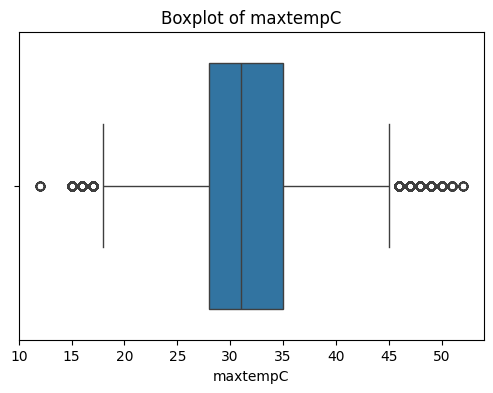

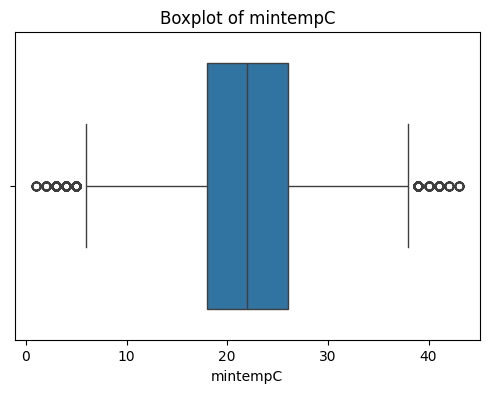

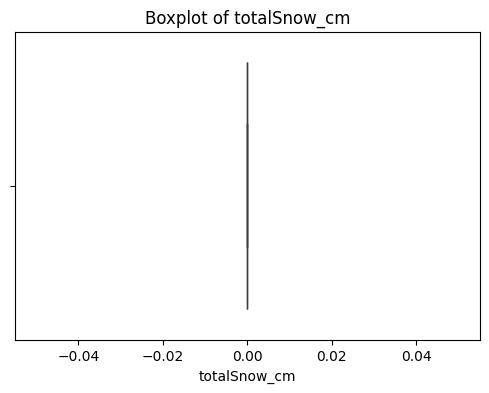

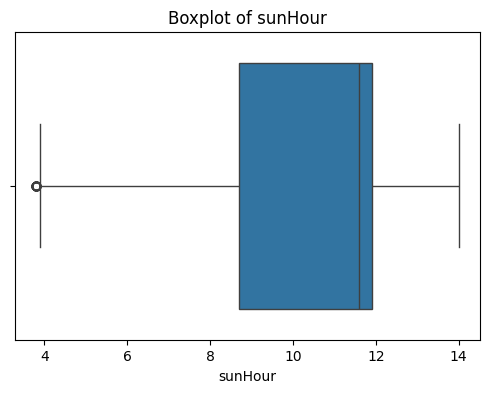

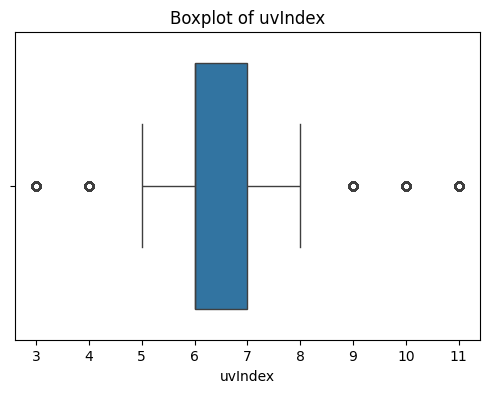

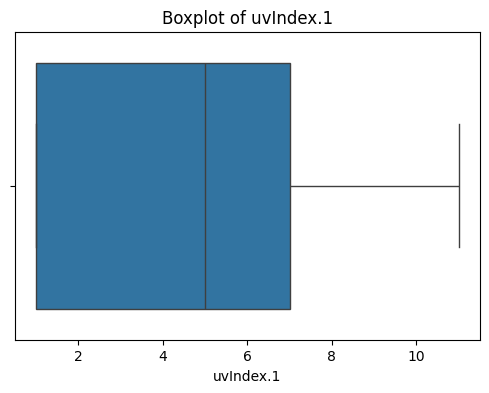

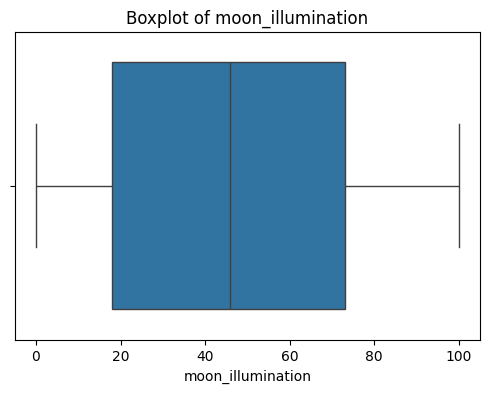

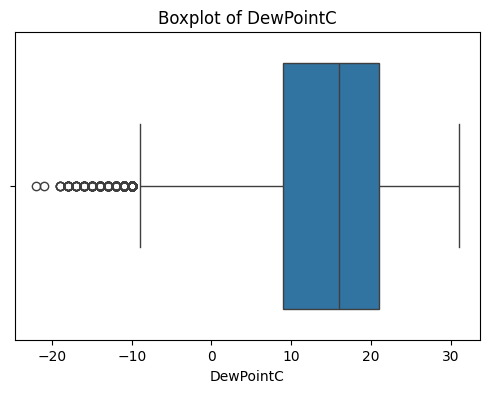

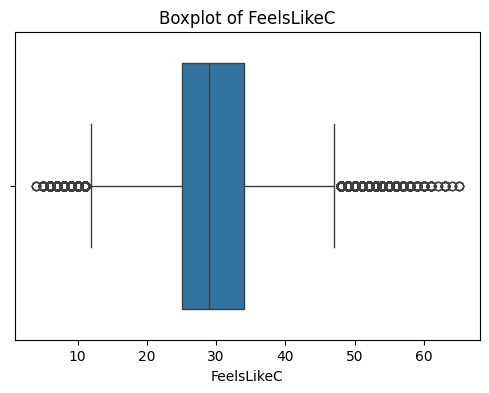

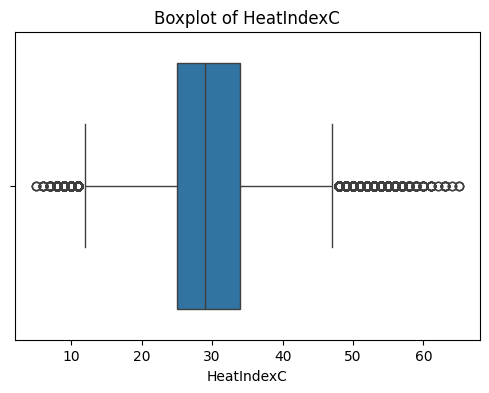

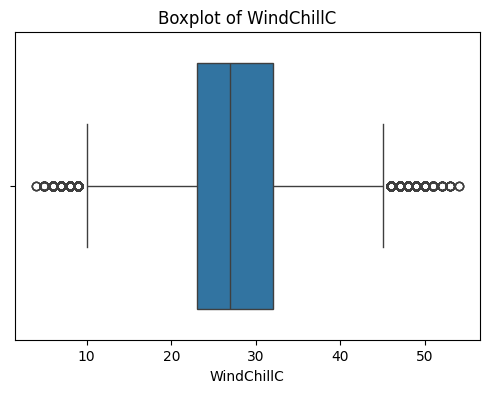

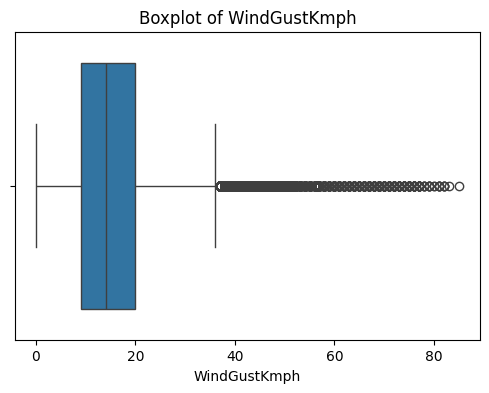

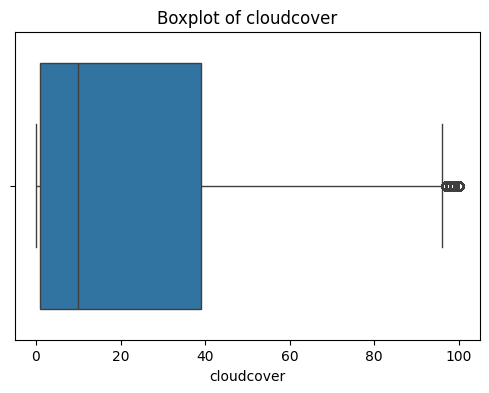

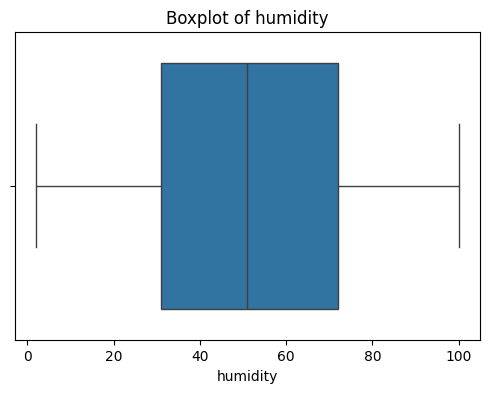

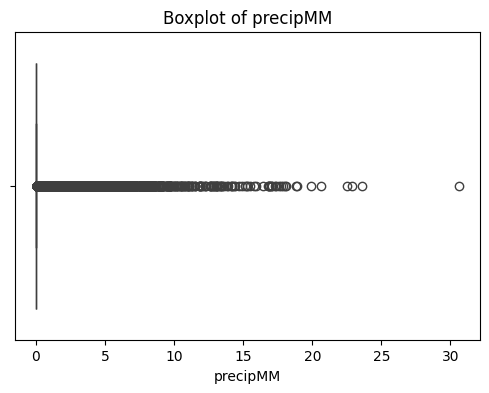

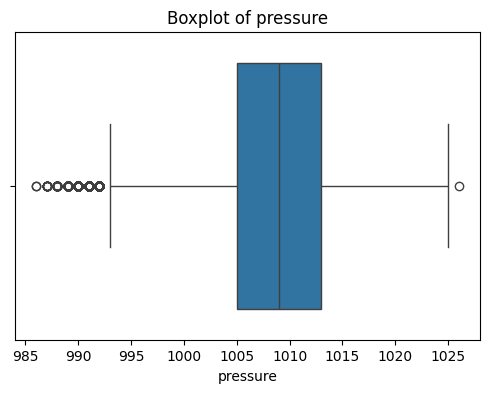

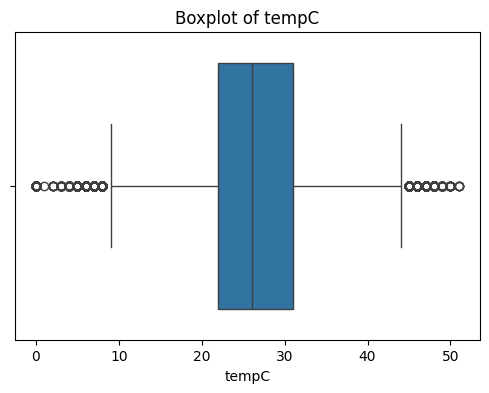

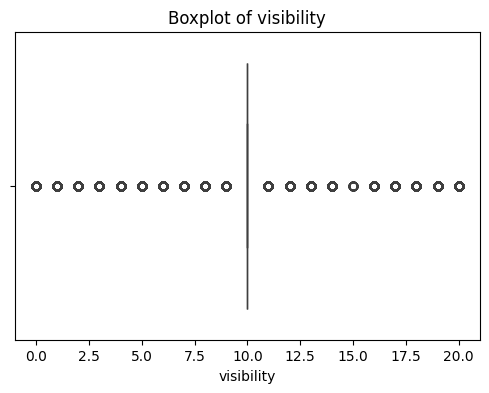

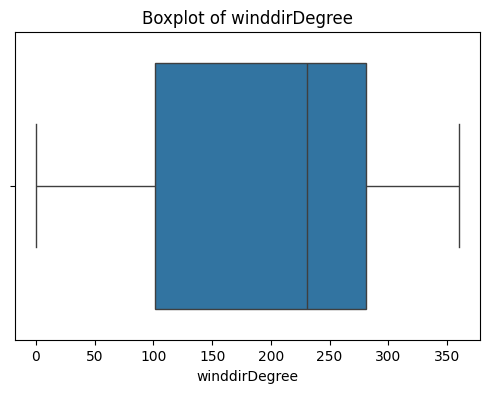

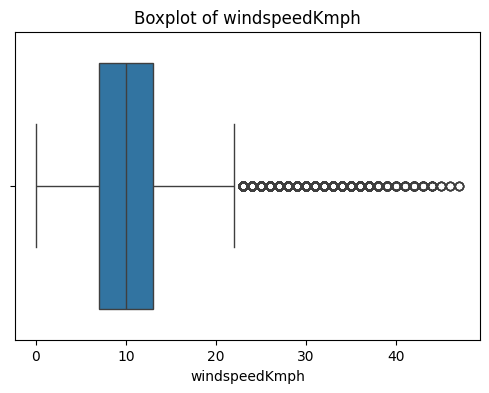

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

for col in combined_df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=combined_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Feature Selection

Dropping redundant values

In [135]:
if 'uvIndex.1' in combined_df.columns:
    combined_df = combined_df.drop('uvIndex.1', axis=1)
    print("Dropped duplicate column 'uvIndex.1'")

Dropped duplicate column 'uvIndex.1'


Temporal Features

In [ ]:
# Add lag features and trends to capture time-dependent patterns
combined_df['tempC_lag1'] = combined_df.groupby('city')['tempC'].shift(1)
combined_df['pressure_lag1'] = combined_df.groupby('city')['pressure'].shift(1)
combined_df['tempC_hourly_change'] = combined_df.groupby('city')['tempC'].diff()
combined_df['pressure_trend'] = combined_df.groupby('city')['pressure'].diff(3)
combined_df.fillna(0, inplace=True)

Calculating correlation between FeelsLikeC, WindChillC and HeatIndexC

In [137]:
correlation_feel_chill = combined_df['FeelsLikeC'].corr(combined_df['WindChillC'])
correlation_feel_heat = combined_df['FeelsLikeC'].corr(combined_df['HeatIndexC'])
print(f"\nCorrelation between FeelsLikeC and WindChillC: {correlation_feel_chill:.2f}")
print(f"Correlation between FeelsLikeC and HeatIndexC: {correlation_feel_heat:.2f}")


Correlation between FeelsLikeC and WindChillC: 0.95
Correlation between FeelsLikeC and HeatIndexC: 1.00


Droping WindChillC and HeatIndexC because correlation > 0.95

In [138]:
threshold = 0.95
if abs(correlation_feel_chill) > threshold and 'WindChillC' in combined_df.columns:
    combined_df = combined_df.drop('WindChillC', axis=1)
    print("Dropped 'WindChillC' due to high correlation with 'FeelsLikeC'")
if abs(correlation_feel_heat) > threshold and 'HeatIndexC' in combined_df.columns:
    combined_df = combined_df.drop('HeatIndexC', axis=1)
    print("Dropped 'HeatIndexC' due to high correlation with 'FeelsLikeC'")

Dropped 'WindChillC' due to high correlation with 'FeelsLikeC'
Dropped 'HeatIndexC' due to high correlation with 'FeelsLikeC'


Finding each city's longitude and latitude

In [139]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="weather_forecast")

def get_lat_lon(city):
    try:
        location = geolocator.geocode(city + ", India")
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error geocoding {city}: {e}")
        return None, None

unique_cities = combined_df['city'].unique()
# city_coordinates = {}

# for city in unique_cities:
#     if city not in city_coordinates:
#         latitude, longitude = get_lat_lon(city)
#         city_coordinates[city] = (latitude, longitude)
#         print(f"Coordinates for {city}: Lat={latitude}, Lon={longitude}")

Did not get reliable data from geopy so adding coordinates mannually.

In [140]:
city_coordinates = {
    'delhi': (28.6273928, 77.1716954),
    'nagpur': (21.1498134, 79.0820556),
    'kanpur': (26.4609135, 80.3217588),
    'bombay': (19.054999, 72.8692035),
    'bengaluru': (12.971599, 77.594566),
    'pune': (18.5213738, 73.8545071),
    'hyderabad': (17.360589, 78.4740613),
    'jaipur': (26.9154576, 75.8189817),
}

Adding longitude and latitude of cities as features

In [141]:
combined_df['latitude'] = combined_df['city'].map(lambda city: city_coordinates.get(city, (None, None))[0])
combined_df['longitude'] = combined_df['city'].map(lambda city: city_coordinates.get(city, (None, None))[1])

print("Added 'latitude' and 'longitude' columns.")

Added 'latitude' and 'longitude' columns.


In [142]:
# Convert 'date_time' to datetime objects
combined_df['date_time'] = pd.to_datetime(combined_df['date_time'])
print("\nConverted objects column to datetime objects.")


Converted objects column to datetime objects.


In [143]:
def convert_time_to_time_object(time_str):
    """Converts a time string in HH:MM AM/PM format to a datetime.time object."""
    try:
        from datetime import datetime
        if isinstance(time_str, str):
            time_obj = datetime.strptime(time_str, '%I:%M %p').time()
            return time_obj
        else:
            return None  # Handle non-string values (e.g., NaN)
    except ValueError:
        return None  # Handle cases where the format might be incorrect

# Apply the conversion function to each of the time columns
combined_df['sunrise_time'] = combined_df['sunrise'].apply(convert_time_to_time_object)
combined_df['sunset_time'] = combined_df['sunset'].apply(convert_time_to_time_object)
combined_df['moonrise_time'] = combined_df['moonrise'].apply(convert_time_to_time_object)
combined_df['moonset_time'] = combined_df['moonset'].apply(convert_time_to_time_object)

# Display the first few rows with the new time columns
print(combined_df[['sunrise', 'sunrise_time', 'sunset', 'sunset_time', 'moonrise', 'moonrise_time', 'moonset', 'moonset_time']].head())

# Drop the original string columns since we only the time objects
combined_df = combined_df.drop(columns=['sunrise', 'sunset', 'moonrise', 'moonset'])
print("\nDropped the original sunrise, sunset, moonrise, and moonset string columns.")
print(combined_df.columns)

    sunrise sunrise_time    sunset sunset_time  moonrise moonrise_time  \
0  06:42 AM     06:42:00  06:05 PM    18:05:00  09:58 AM      09:58:00   
1  06:42 AM     06:42:00  06:05 PM    18:05:00  09:58 AM      09:58:00   
2  06:42 AM     06:42:00  06:05 PM    18:05:00  09:58 AM      09:58:00   
3  06:42 AM     06:42:00  06:05 PM    18:05:00  09:58 AM      09:58:00   
4  06:42 AM     06:42:00  06:05 PM    18:05:00  09:58 AM      09:58:00   

    moonset moonset_time  
0  10:03 PM     22:03:00  
1  10:03 PM     22:03:00  
2  10:03 PM     22:03:00  
3  10:03 PM     22:03:00  
4  10:03 PM     22:03:00  

Dropped the original sunrise, sunset, moonrise, and moonset string columns.
Index(['date_time', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour',
       'uvIndex', 'moon_illumination', 'DewPointC', 'FeelsLikeC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph', 'city',
       'tempC_lag1', 'pressure_lag

In [144]:
# Extract temporal features
combined_df['hour'] = combined_df['date_time'].dt.hour
combined_df['dayofweek'] = combined_df['date_time'].dt.dayofweek  # Monday=0, Sunday=6
combined_df['month'] = combined_df['date_time'].dt.month
combined_df['dayofyear'] = combined_df['date_time'].dt.dayofyear
print("\nExtracted temporal features: 'hour', 'dayofweek', 'month', 'dayofyear'.")


Extracted temporal features: 'hour', 'dayofweek', 'month', 'dayofyear'.


Weather conditions

In [145]:
def categorize_weather(row):
    if row['precipMM'] > 1:
        return 'rainy'
    elif row['totalSnow_cm'] > 0.1:
        return 'snowy'
    elif row['cloudcover'] < 10:
        return 'clear'
    elif row['cloudcover'] < 50:
        return 'sunny'
    else:
        return 'cloudy'

combined_df['weather_condition'] = combined_df.apply(categorize_weather, axis=1)
print("\nCreated a more detailed 'weather_condition' target variable.")
print(combined_df['weather_condition'].value_counts())
print(combined_df.head())


Created a more detailed 'weather_condition' target variable.
weather_condition
clear     385276
sunny     244734
cloudy    126324
rainy      15122
Name: count, dtype: int64
            date_time  maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  \
0 2009-01-01 00:00:00        27        12           0.0     11.6        5   
1 2009-01-01 01:00:00        27        12           0.0     11.6        5   
2 2009-01-01 02:00:00        27        12           0.0     11.6        5   
3 2009-01-01 03:00:00        27        12           0.0     11.6        5   
4 2009-01-01 04:00:00        27        12           0.0     11.6        5   

   moon_illumination  DewPointC  FeelsLikeC  WindGustKmph  ...  longitude  \
0                 31         16          18            11  ...  77.594566   
1                 31         16          17             9  ...  77.594566   
2                 31         15          16             7  ...  77.594566   
3                 31         15          15            

In [146]:
def degrees_to_direction(degrees):
    """Converts wind direction in degrees to a textual representation (e.g., NNW, S, SW)."""
    degrees = float(degrees)
    if 337.5 <= degrees < 360 or 0 <= degrees < 22.5:
        return "N"
    elif 22.5 <= degrees < 45:
        return "NNE"
    elif 45 <= degrees < 67.5:
        return "NE"
    elif 67.5 <= degrees < 90:
        return "ENE"
    elif 90 <= degrees < 112.5:
        return "E"
    elif 112.5 <= degrees < 135:
        return "ESE"
    elif 135 <= degrees < 157.5:
        return "SE"
    elif 157.5 <= degrees < 180:
        return "SSE"
    elif 180 <= degrees < 202.5:
        return "S"
    elif 202.5 <= degrees < 225:
        return "SSW"
    elif 225 <= degrees < 247.5:
        return "SW"
    elif 247.5 <= degrees < 270:
        return "WSW"
    elif 270 <= degrees < 292.5:
        return "W"
    elif 292.5 <= degrees < 315:
        return "WNW"
    elif 315 <= degrees < 337.5:
        return "NW"
    else:
        return None  # Handle cases with invalid degree values

# Apply the function to the 'winddirDegree' column to create a new 'winddir_text' column
combined_df['winddir_text'] = combined_df['winddirDegree'].apply(degrees_to_direction)

print(combined_df[['winddirDegree', 'winddir_text']].head())
print(combined_df['winddir_text'].value_counts())

   winddirDegree winddir_text
0            109            E
1             85          ENE
2             61           NE
3             37          NNE
4             45           NE
winddir_text
WSW    99515
W      94973
WNW    74034
E      64808
ENE    56860
SW     54225
NW     50001
ESE    48772
N      46825
NE     43797
NNE    34668
SE     33040
SSW    26340
SSE    21852
S      21501
Name: count, dtype: int64


In [147]:
combined_df.columns

Index(['date_time', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour',
       'uvIndex', 'moon_illumination', 'DewPointC', 'FeelsLikeC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph', 'city',
       'tempC_lag1', 'pressure_lag1', 'tempC_hourly_change', 'pressure_trend',
       'latitude', 'longitude', 'sunrise_time', 'sunset_time', 'moonrise_time',
       'moonset_time', 'hour', 'dayofweek', 'month', 'dayofyear',
       'weather_condition', 'winddir_text'],
      dtype='object')

Correlation between feature and target variables

In [148]:
numerical_targets = ['tempC', 'FeelsLikeC', 'humidity', 'windspeedKmph', 'precipMM', 'maxtempC', 'mintempC', 'winddirDegree', 'cloudcover']
numerical_features = ['latitude', 'longitude', 'hour', 'dayofweek', 'month', 'dayofyear', 'pressure', 'visibility']

for target in numerical_targets:
    print(f"\nCorrelation with {target}:")
    for feature in numerical_features:
        if feature in combined_df.columns and target in combined_df.columns:
            correlation = combined_df[target].corr(combined_df[feature])
            print(f"  {feature}: {correlation:.3f}")
        else:
            print(f"  {feature}: Feature or target not found in DataFrame")


Correlation with tempC:
  latitude: 0.110
  longitude: 0.038
  hour: 0.095
  dayofweek: -0.001
  month: -0.071
  dayofyear: -0.073
  pressure: -0.657
  visibility: 0.121

Correlation with FeelsLikeC:
  latitude: 0.165
  longitude: -0.024
  hour: 0.062
  dayofweek: -0.002
  month: -0.011
  dayofyear: -0.014
  pressure: -0.695
  visibility: 0.107

Correlation with humidity:
  latitude: -0.357
  longitude: -0.193
  hour: -0.079
  dayofweek: 0.002
  month: 0.274
  dayofyear: 0.272
  pressure: -0.034
  visibility: -0.351

Correlation with windspeedKmph:
  latitude: -0.191
  longitude: -0.034
  hour: 0.039
  dayofweek: -0.003
  month: -0.048
  dayofyear: -0.048
  pressure: -0.259
  visibility: 0.009

Correlation with precipMM:
  latitude: -0.053
  longitude: -0.051
  hour: 0.008
  dayofweek: -0.002
  month: 0.053
  dayofyear: 0.052
  pressure: -0.122
  visibility: -0.310

Correlation with maxtempC:
  latitude: 0.186
  longitude: 0.131
  hour: 0.000
  dayofweek: -0.003
  month: -0.179
  dayo

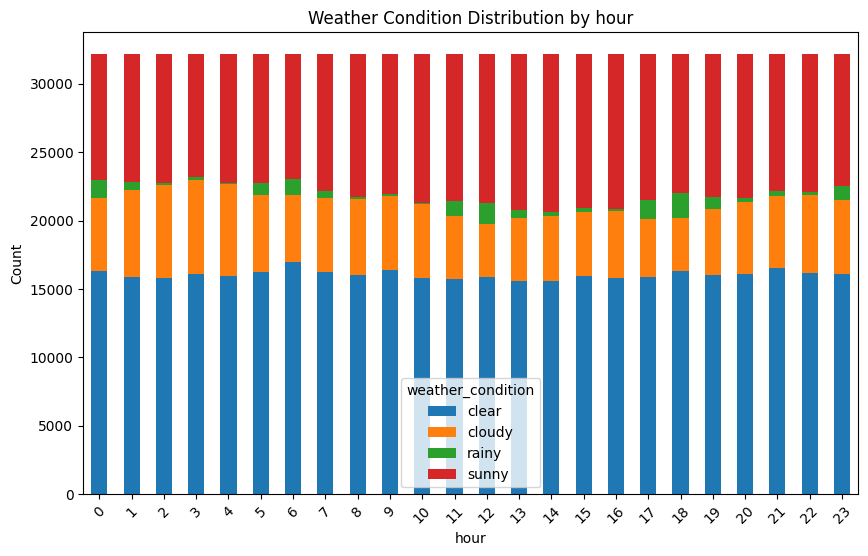

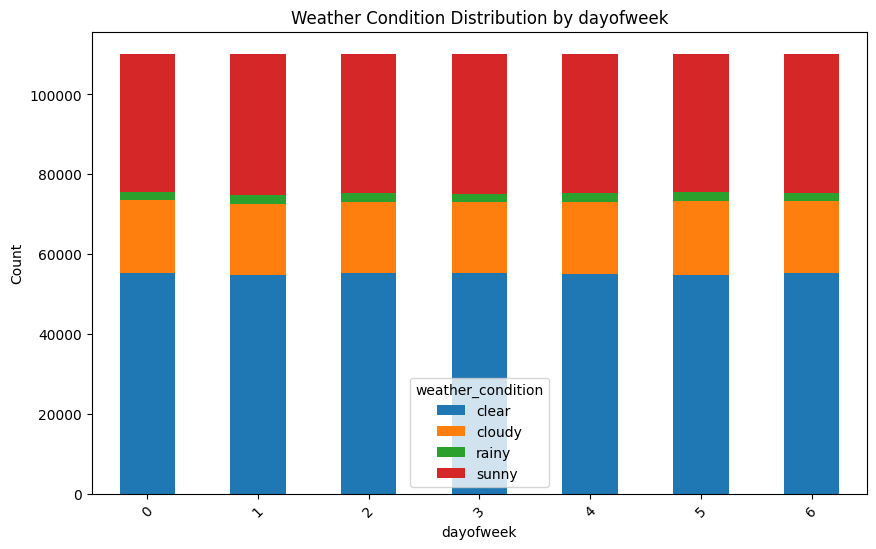

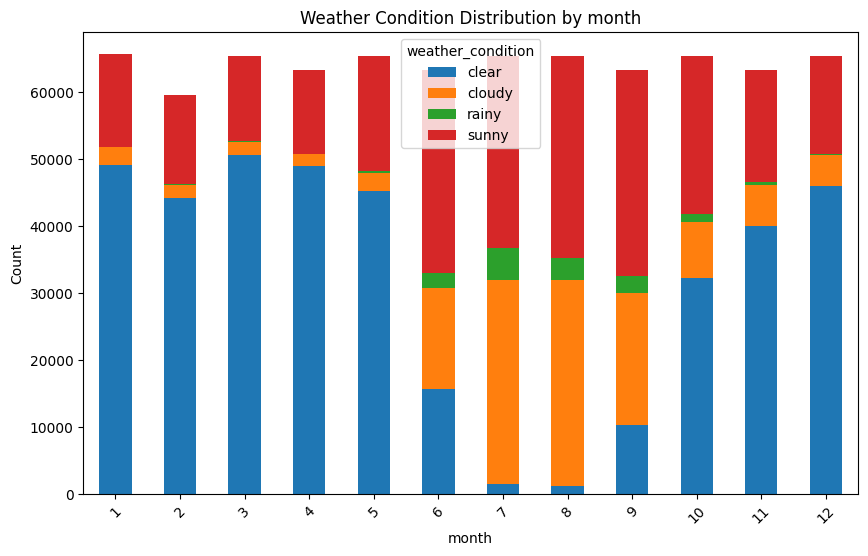

In [149]:
def stacked_bar_chart(data, x, hue, title):
      cross_tab = pd.crosstab(data[x], data[hue])
      cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
      plt.title(title)
      plt.xlabel(x)
      plt.ylabel("Count")
      plt.xticks(rotation=45)
      plt.show()

for feature in ['hour', 'dayofweek', 'month']:
    if feature in combined_df.columns:
        stacked_bar_chart(combined_df, feature, 'weather_condition', f"Weather Condition Distribution by {feature}")
    else:
        print(f"Skipping stacked bar chart: {feature} not found")

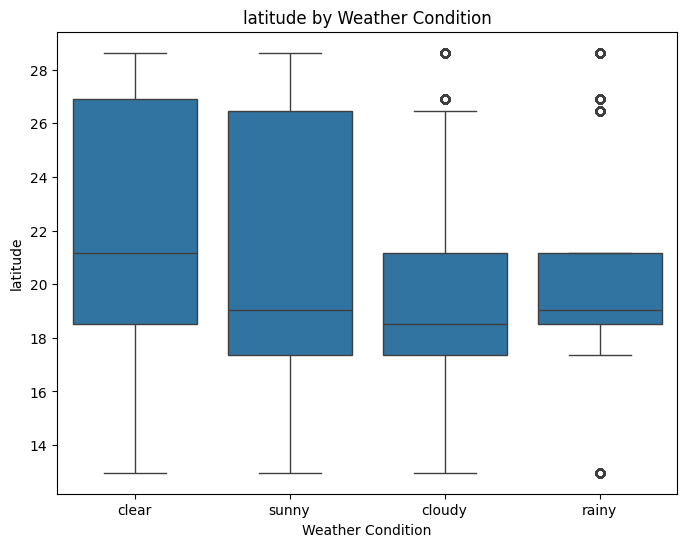

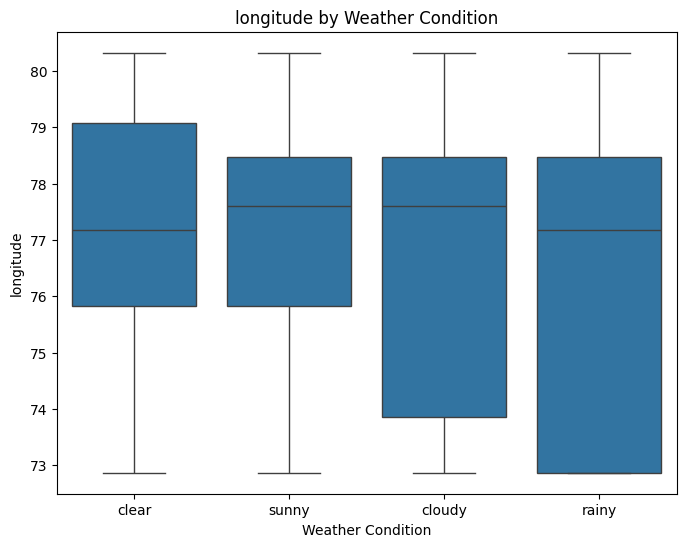

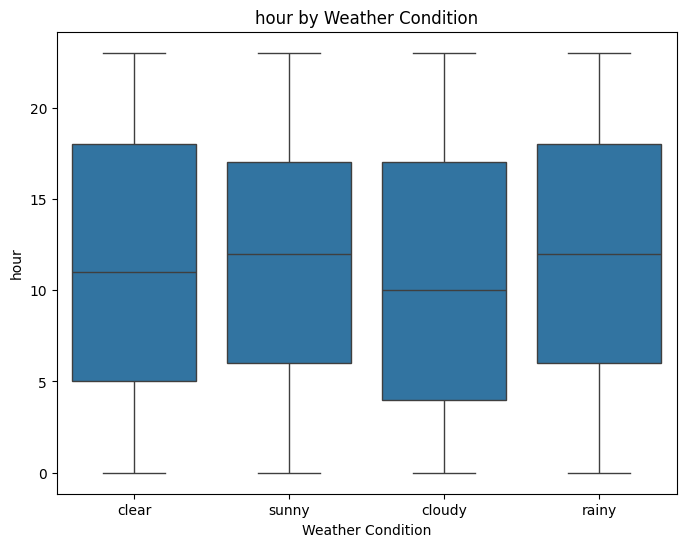

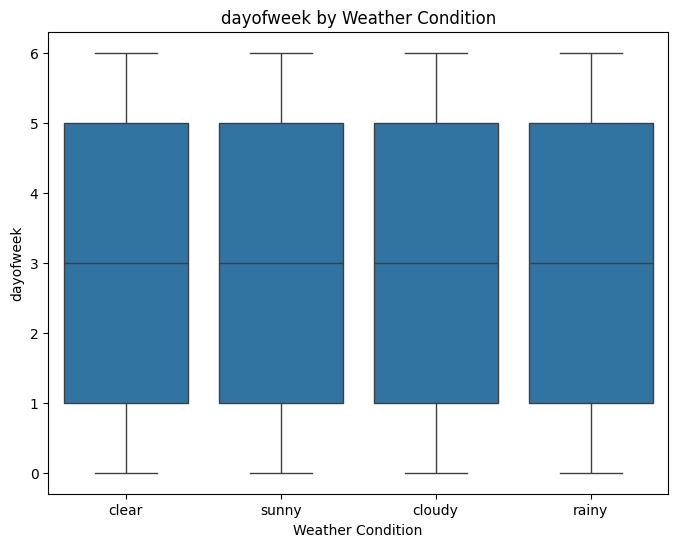

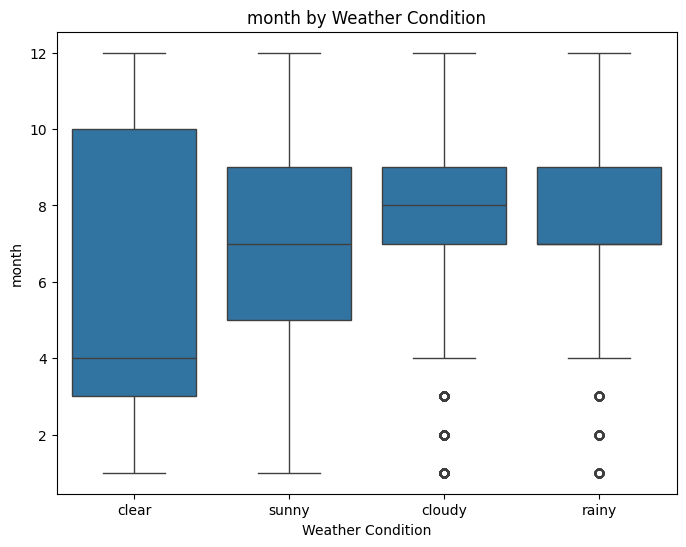

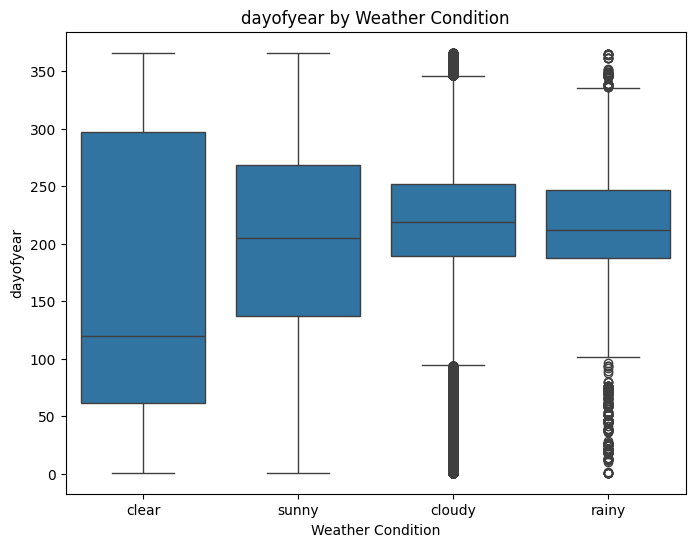

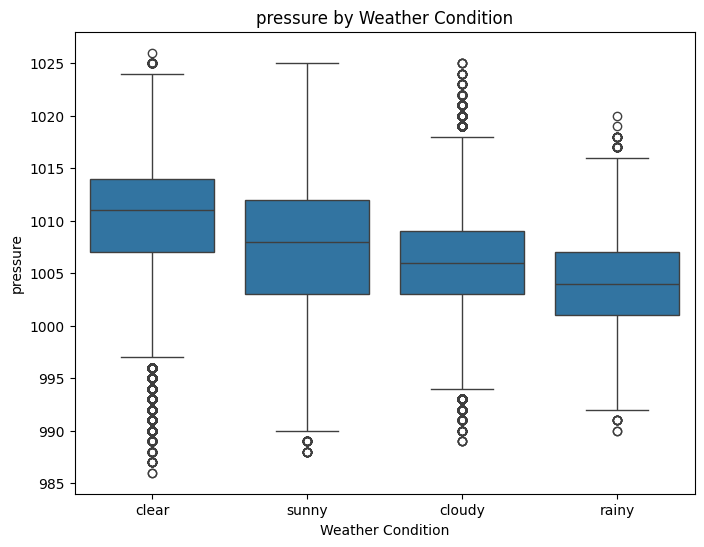

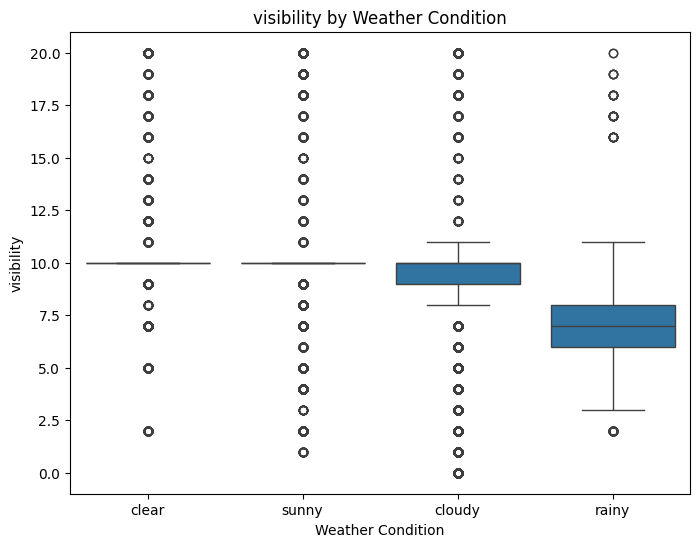

In [150]:
for feature in numerical_features:
      if feature in combined_df.columns:
          plt.figure(figsize=(8, 6))
          sns.boxplot(x=combined_df['weather_condition'], y=combined_df[feature])
          plt.title(f"{feature} by Weather Condition")
          plt.xlabel("Weather Condition")
          plt.ylabel(feature)
          plt.show()
      else:
          print(f"Skipping boxplot: {feature} not found")

Sorting dataframe by datetime so that prediction is made on future unseen data

In [151]:
combined_df = combined_df.sort_values(by='date_time').reset_index(drop=True)
print("DataFrame sorted by 'date_time'.")

DataFrame sorted by 'date_time'.


In [152]:
import datetime
def time_to_minutes(time_obj):
    if isinstance(time_obj, datetime.time):
        return time_obj.hour * 60 + time_obj.minute
    else:
        return None

combined_df['sunrise_minutes'] = combined_df['sunrise_time'].apply(time_to_minutes)
combined_df['sunset_minutes'] = combined_df['sunset_time'].apply(time_to_minutes)
combined_df['moonrise_minutes'] = combined_df['moonrise_time'].apply(time_to_minutes)
combined_df['moonset_minutes'] = combined_df['moonset_time'].apply(time_to_minutes)

Handling Categorical Features for Modeling

In [153]:
# One-Hot Encoding for 'city'
combined_df = pd.get_dummies(combined_df, columns=['city'], drop_first=True)
print("One-hot encoded 'city'")

# Label Encode for 'weather_condition' for some classification models
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
combined_df['weather_condition_encoded'] = le.fit_transform(combined_df['weather_condition'])
print("Label encoded 'weather_condition' into 'weather_condition_encoded'.")

One-hot encoded 'city'
Label encoded 'weather_condition' into 'weather_condition_encoded'.


Scaling numerical features

In [154]:
from sklearn.preprocessing import StandardScaler

numerical_cols = combined_df.select_dtypes(include=np.number).columns.tolist()
# Exclude the target variables and potentially identifier columns
cols_to_scale = [col for col in numerical_cols if col not in ['weather_condition_encoded'] and col not in ['latitude', 'longitude']]

scaler = StandardScaler()
combined_df[cols_to_scale] = scaler.fit_transform(combined_df[cols_to_scale])
print("Scaled numerical features.")

Scaled numerical features.


In [155]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771456 entries, 0 to 771455
Data columns (total 46 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date_time                  771456 non-null  datetime64[ns]
 1   maxtempC                   771456 non-null  float64       
 2   mintempC                   771456 non-null  float64       
 3   totalSnow_cm               771456 non-null  float64       
 4   sunHour                    771456 non-null  float64       
 5   uvIndex                    771456 non-null  float64       
 6   moon_illumination          771456 non-null  float64       
 7   DewPointC                  771456 non-null  float64       
 8   FeelsLikeC                 771456 non-null  float64       
 9   WindGustKmph               771456 non-null  float64       
 10  cloudcover                 771456 non-null  float64       
 11  humidity                   771456 non-null  float64 

# Model Training

Importing all the models and performance metrics

In [156]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score
from sklearn.neural_network import MLPRegressor, MLPClassifier
import numpy as np
import datetime

In [157]:
print(combined_df.isnull().any())  # Returns True/False for each column if it contains any NaN
print(combined_df.isnull().sum())  # Returns the count of NaN values in each column
print(combined_df.isnull().values.any())  # Returns True if the entire DataFrame contains at least one NaN

date_time                    False
maxtempC                     False
mintempC                     False
totalSnow_cm                 False
sunHour                      False
uvIndex                      False
moon_illumination            False
DewPointC                    False
FeelsLikeC                   False
WindGustKmph                 False
cloudcover                   False
humidity                     False
precipMM                     False
pressure                     False
tempC                        False
visibility                   False
winddirDegree                False
windspeedKmph                False
tempC_lag1                   False
pressure_lag1                False
tempC_hourly_change          False
pressure_trend               False
latitude                     False
longitude                    False
sunrise_time                 False
sunset_time                  False
moonrise_time                 True
moonset_time                  True
hour                

Dropping the moonrise and moonset related columns and deleting rows where winddir_test is NaN

In [158]:
# Drop specified columns
columns_to_drop = ['moonrise_time', 'moonset_time', 'moonrise_minutes', 'moonset_minutes']
combined_df = combined_df.drop(columns=columns_to_drop, errors='ignore')
# The 'errors='ignore' argument will prevent an error if any of these columns don't exist.

# Delete rows where 'winddir_text' is NaN
combined_df = combined_df.dropna(subset=['winddir_text'])

# Verify the changes
print("NaN values after dropping columns and rows:")
print(combined_df.isnull().sum())

NaN values after dropping columns and rows:
date_time                    0
maxtempC                     0
mintempC                     0
totalSnow_cm                 0
sunHour                      0
uvIndex                      0
moon_illumination            0
DewPointC                    0
FeelsLikeC                   0
WindGustKmph                 0
cloudcover                   0
humidity                     0
precipMM                     0
pressure                     0
tempC                        0
visibility                   0
winddirDegree                0
windspeedKmph                0
tempC_lag1                   0
pressure_lag1                0
tempC_hourly_change          0
pressure_trend               0
latitude                     0
longitude                    0
sunrise_time                 0
sunset_time                  0
hour                         0
dayofweek                    0
month                        0
dayofyear                    0
weather_condition         

Splitting the data into test and train

In [159]:
# Sort by date_time
combined_df = combined_df.sort_values(by='date_time').reset_index(drop=True)

# Define features (X)
X = combined_df[[
    'hour', 'dayofweek', 'month', 'dayofyear', 'latitude', 'longitude',
    'city_bombay', 'city_delhi', 'city_hyderabad', 'city_jaipur',
    'city_kanpur', 'city_nagpur', 'city_pune'
]]

# Define target variables (y)
y_regression = combined_df[[
    'tempC', 'maxtempC', 'mintempC', 'FeelsLikeC', 'winddirDegree',
    'humidity', 'cloudcover', 'windspeedKmph', 'precipMM',
    'sunrise_minutes', 'sunset_minutes'
]]
y_classification = combined_df['weather_condition_encoded']

# Split data
X_train, X_test, y_train_reg, y_test_reg, y_train_clf, y_test_clf = train_test_split(
    X, y_regression, y_classification, test_size=0.2, random_state=42, shuffle=False
)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform X_train, and transform X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data split and scaled.")
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train_reg shape: {y_train_reg.shape}, y_test_reg shape: {y_test_reg.shape}")
print(f"y_train_clf shape: {y_train_clf.shape}, y_test_clf shape: {y_test_clf.shape}")

Data split and scaled.
X_train shape: (616968, 13), X_test shape: (154243, 13)
y_train_reg shape: (616968, 11), y_test_reg shape: (154243, 11)
y_train_clf shape: (616968,), y_test_clf shape: (154243,)


In [ ]:

# Original features + new temporal features
lag_features = ['tempC_lag1', 'pressure_lag1', 'tempC_hourly_change', 'pressure_trend']
selected_features = [col for col in X.columns if col not in lag_features] + lag_features  # Preserve original features
X = combined_df[selected_features]

Training the models on the data

Regression models

In [162]:
print("\n--- Regression Models (Multi-Output) ---")

# Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_scaled, y_train_reg)
rf_predictions = rf_reg.predict(X_test_scaled)
rf_mse = mean_squared_error(y_test_reg, rf_predictions)
print(f"Random Forest Regressor Mean MSE: {rf_mse:.2f}")

# Neural Network Regressor (MLPRegressor)
mlp_reg = MLPRegressor(random_state=42, max_iter=300, hidden_layer_sizes=(64, 64))
mlp_reg.fit(X_train_scaled, y_train_reg)
mlp_predictions = mlp_reg.predict(X_test_scaled)
mlp_mse = mean_squared_error(y_test_reg, mlp_predictions)
print(f"Neural Network Regressor Mean MSE: {mlp_mse:.2f}")

# Linear Regression and SVR are inherently single-output.
# For multi-output with these, we will use MultiOutputRegressor wrapper.
from sklearn.multioutput import MultiOutputRegressor

# Multi-Output Linear Regression
mor_lr = MultiOutputRegressor(LinearRegression())
mor_lr.fit(X_train_scaled, y_train_reg)
mor_lr_predictions = mor_lr.predict(X_test_scaled)
mor_lr_mse = mean_squared_error(y_test_reg, mor_lr_predictions)
print(f"Multi-Output Linear Regression Mean MSE: {mor_lr_mse:.2f}")

# LightGBM Regressor (Multi-Output)
from lightgbm import LGBMRegressor
from sklearn.multioutput import MultiOutputRegressor

# Wrap LightGBM with MultiOutputRegressor
lgb_reg = MultiOutputRegressor(LGBMRegressor(n_estimators=100, random_state=42))
lgb_reg.fit(X_train_scaled, y_train_reg)
lgb_reg_preds = lgb_reg.predict(X_test_scaled)
lgb_mse = mean_squared_error(y_test_reg, lgb_reg_preds)
print(f"LightGBM Regressor MSE: {lgb_mse:.4f}")




--- Regression Models (Multi-Output) ---
Random Forest Regressor Mean MSE: 0.58
Neural Network Regressor Mean MSE: 0.47
Multi-Output Linear Regression Mean MSE: 1.02
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 338
[LightGBM] [Info] Number of data points in the train set: 616968, number of used features: 13
[LightGBM] [Info] Start training from score -0.023258
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 338
[LightGBM] [Info] Number of data points in the train set: 616968, number of used features: 13
[LightGBM] [Info] Start training from score 0.011559
[LightGBM] [Info] Au

c:\Users\deepa\OneDrive\Programming\Projects\GitHub\Self_Updating-_Weather_forecast_System\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\deepa\OneDrive\Programming\Projects\GitHub\Self_Updating-_Weather_forecast_System\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\deepa\OneDrive\Programming\Projects\GitHub\Self_Updating-_Weather_forecast_System\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\deepa\OneDrive\Programming\Projects\GitHub\Self_Updating-_Weather_forecast_System\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMR

LightGBM Regressor MSE: 0.4619


Classification models

In [163]:
# --- Classification Models ---
print("\n--- Classification Models ---")

# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=20)
rf_clf.fit(X_train_scaled, y_train_clf)
rf_predictions_clf = rf_clf.predict(X_test_scaled)
rf_accuracy_clf = accuracy_score(y_test_clf, rf_predictions_clf)
rf_f1_clf = f1_score(y_test_clf, rf_predictions_clf, average='weighted')
print(f"Random Forest Classifier Accuracy: {rf_accuracy_clf:.2f}, F1-score: {rf_f1_clf:.2f}")

# Neural Network Classifier (MLPClassifier)
mlp_clf = MLPClassifier(random_state=42, max_iter=300, hidden_layer_sizes=(64, 64))
mlp_clf.fit(X_train_scaled, y_train_clf)
mlp_predictions_clf = mlp_clf.predict(X_test_scaled)
mlp_accuracy_clf = accuracy_score(y_test_clf, mlp_predictions_clf)
mlp_f1_clf = f1_score(y_test_clf, mlp_predictions_clf, average='weighted')
print(f"Neural Network Classifier Accuracy: {mlp_accuracy_clf:.2f}, F1-score: {mlp_f1_clf:.2f}")

# LightGBM Classifier
from lightgbm import LGBMClassifier
lgb_clf = LGBMClassifier(n_estimators=100, random_state=42)
lgb_clf.fit(X_train_scaled, y_train_clf)
lgb_predictions_clf = lgb_clf.predict(X_test_scaled)
lgb_accuracy_clf = accuracy_score(y_test_clf, lgb_predictions_clf)
lgb_f1_clf = f1_score(y_test_clf, lgb_predictions_clf, average='weighted')
print(f"LightGBM Classifier Accuracy: {lgb_accuracy_clf:.2f}, F1-score: {lgb_f1_clf:.2f}")


--- Classification Models ---
Random Forest Classifier Accuracy: 0.58, F1-score: 0.57
Neural Network Classifier Accuracy: 0.64, F1-score: 0.61
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 338
[LightGBM] [Info] Number of data points in the train set: 616968, number of used features: 13
[LightGBM] [Info] Start training from score -0.692473
[LightGBM] [Info] Start training from score -1.839656
[LightGBM] [Info] Start training from score -4.136128
[LightGBM] [Info] Start training from score -1.124527


c:\Users\deepa\OneDrive\Programming\Projects\GitHub\Self_Updating-_Weather_forecast_System\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM Classifier Accuracy: 0.64, F1-score: 0.61


In [164]:
# --- Finding the Best Model ---
print("\n--- Finding the Best Model ---")

# Regression Models
print("\nRegression Models (lower MSE is better):")
best_reg_model = None
best_reg_mse = float('inf')
reg_results = {
    "Multi output Linear Regression": mor_lr_mse,
    "Random Forest Regressor": rf_mse,
    "Neural Network Regressor": mlp_mse,
    "LightGBM Regressor": lgb_mse 
}
for name, mse in reg_results.items():
    print(f"{name}: {mse:.2f}")
    if mse < best_reg_mse:
        best_reg_mse = mse
        best_reg_model = name
print(f"\nBest Regression Model: {best_reg_model} (MSE: {best_reg_mse:.2f})")


--- Finding the Best Model ---

Regression Models (lower MSE is better):
Multi output Linear Regression: 1.02
Random Forest Regressor: 0.58
Neural Network Regressor: 0.47
LightGBM Regressor: 0.46

Best Regression Model: LightGBM Regressor (MSE: 0.46)


In [165]:
print(f"\nBest Regression Model based on MSE: {best_reg_model} (MSE: {best_reg_mse:.2f})")


Best Regression Model based on MSE: LightGBM Regressor (MSE: 0.46)


In [166]:
# Classification Models
print("\nClassification Models (higher Accuracy and F1-score are better):")
best_clf_model_acc = None
best_clf_accuracy = 0.0
best_clf_model_f1 = None
best_clf_f1 = 0.0
clf_results = {
    "Random Forest Classifier": (rf_accuracy_clf, rf_f1_clf),
    "Neural Network Classifier": (mlp_accuracy_clf, mlp_f1_clf),
    "LightGBM Classifier": (lgb_accuracy_clf, lgb_f1_clf)
}
for name, (accuracy, f1) in clf_results.items():
    print(f"{name}: Accuracy = {accuracy:.2f}, F1-score = {f1:.2f}")
    if accuracy > best_clf_accuracy:
        best_clf_accuracy = accuracy
        best_clf_model_acc = name
    if f1 > best_clf_f1:
        best_clf_f1 = f1
        best_clf_model_f1 = name


Classification Models (higher Accuracy and F1-score are better):
Random Forest Classifier: Accuracy = 0.58, F1-score = 0.57
Neural Network Classifier: Accuracy = 0.64, F1-score = 0.61
LightGBM Classifier: Accuracy = 0.64, F1-score = 0.61


In [167]:
print(f"\nBest Classification Model based on Accuracy: {best_clf_model_acc} (Accuracy: {best_clf_accuracy:.2f})")
print(f"Best Classification Model based on F1-score: {best_clf_model_f1} (F1-score: {best_clf_f1:.2f})")


Best Classification Model based on Accuracy: LightGBM Classifier (Accuracy: 0.64)
Best Classification Model based on F1-score: LightGBM Classifier (F1-score: 0.61)


# Hyperparameter Tuning

In [ ]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error
import numpy as np

In [169]:
# Cross-validation setup
cv = KFold(n_splits=5, shuffle=True, random_state=42)

### MLP Hyperparameter Tuning

In [170]:
# --- Hyperparameter tuning for MLPClassifier ---
param_grid_mlp_clf = {
    'hidden_layer_sizes': [(32,), (64,), (32, 16), (64, 32)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [200, 300]
}

param_distributions_mlp_clf = {
    'hidden_layer_sizes': [(np.random.randint(20, 80),), (np.random.randint(20, 80), np.random.randint(20, 80))],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': np.logspace(-5, -2, 3),
    'learning_rate_init': np.logspace(-4, -1, 3),
    'batch_size': [32, 64],
    'max_iter': [200, 400],
    'early_stopping': [True, False]
}


In [171]:
random_search_mlp_clf = RandomizedSearchCV(estimator=MLPClassifier(random_state=42),
                                           param_distributions=param_distributions_mlp_clf,
                                           n_iter=10,
                                           scoring='f1_weighted',
                                           cv=cv,
                                           n_jobs=-1,
                                           verbose=1,
                                           random_state=42)
random_search_mlp_clf.fit(X_train_scaled, y_train_clf)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=MLPClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'activation': ['relu', 'tanh',
                                                       'logistic'],
                                        'alpha': array([1.00000000e-05, 3.16227766e-04, 1.00000000e-02]),
                                        'batch_size': [32, 64],
                                        'early_stopping': [True, False],
                                        'hidden_layer_sizes': [(73,), (54, 30)],
                                        'learning_rate_init': array([0.0001    , 0.00316228, 0.1       ]),
                                        'max_iter': [200, 400],
                                        'solver': ['adam', 'sgd']},
                   random_state=42, scoring='f1_weighted', verbose=1)

In [172]:
y_pred_clf_random = random_search_mlp_clf.predict(X_test_scaled)

accuracy_clf_random = accuracy_score(y_test_clf, y_pred_clf_random)
f1_clf_random = f1_score(y_test_clf, y_pred_clf_random, average='weighted')

print(f"RandomizedSearchCV Best Accuracy: {accuracy_clf_random:.4f}, F1-score: {f1_clf_random:.4f}")

RandomizedSearchCV Best Accuracy: 0.6466, F1-score: 0.6132


In [173]:
# --- Hyperparameter tuning for MLPRegressor ---
param_grid_mlp_reg = {
    'hidden_layer_sizes': [(32,), (64,), (32, 16), (64, 32)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [200, 300]
}

param_distributions_mlp_reg = {
    'hidden_layer_sizes': [(np.random.randint(20, 80),), (np.random.randint(20, 80), np.random.randint(20, 80))],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': np.logspace(-5, -2, 3),
    'learning_rate_init': np.logspace(-4, -1, 3),
    'max_iter': [200, 400]
}

In [175]:
random_search_mlp_reg = RandomizedSearchCV(estimator=MLPRegressor(random_state=42),
                                           param_distributions=param_distributions_mlp_reg,
                                           n_iter=10,
                                           scoring='neg_mean_squared_error',
                                           cv=cv,
                                           n_jobs=-1,
                                           verbose=1,
                                           random_state=42)
random_search_mlp_reg.fit(X_train_scaled, y_train_reg)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\deepa\OneDrive\Programming\Projects\GitHub\Self_Updating-_Weather_forecast_System\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\deepa\OneDrive\Programming\Projects\GitHub\Self_Updating-_Weather_forecast_System\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\deepa\OneDrive\Programming\Projects\GitHub\Self_Updating-_Weather_forecast_System\.venv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    r

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=MLPRegressor(random_state=42), n_jobs=-1,
                   param_distributions={'activation': ['relu', 'tanh'],
                                        'alpha': array([1.00000000e-05, 3.16227766e-04, 1.00000000e-02]),
                                        'hidden_layer_sizes': [(32,), (47, 21)],
                                        'learning_rate_init': array([0.0001    , 0.00316228, 0.1       ]),
                                        'max_iter': [200, 400],
                                        'solver': ['adam', 'lbfgs']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [176]:
y_pred_reg_random = random_search_mlp_reg.predict(X_test_scaled)

mse_reg_random = mean_squared_error(y_test_reg, y_pred_reg_random)

print(f"RandomizedSearchCV Best MSE: {mse_reg_random:.4f}")


RandomizedSearchCV Best MSE: 0.4648


### LightGBM Hyperparameter Tuning

In [177]:
# --- LightGBM Regressor Tuning (Multi-Output) ---
from lightgbm import LGBMRegressor
from sklearn.multioutput import MultiOutputRegressor

lgb_reg_param_dist = {
    'estimator__num_leaves': [20, 31, 40],
    'estimator__learning_rate': [0.05, 0.1],
    'estimator__subsample': [0.7, 0.8],
    'estimator__n_estimators': [50, 100]
}

lgb_reg_tuner = RandomizedSearchCV(
    MultiOutputRegressor(LGBMRegressor(random_state=42)),
    param_distributions=lgb_reg_param_dist,
    n_iter=10,  
    scoring='neg_mean_squared_error',
    cv=cv,
    n_jobs=-1,
    random_state=42
)
lgb_reg_tuner.fit(X_train_scaled, y_train_reg)
best_lgb_reg = lgb_reg_tuner.best_estimator_

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 338
[LightGBM] [Info] Number of data points in the train set: 616968, number of used features: 13
[LightGBM] [Info] Start training from score -0.023258
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 338
[LightGBM] [Info] Number of data points in the train set: 616968, number of used features: 13
[LightGBM] [Info] Start training from score 0.011559
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enou

In [178]:
# --- LightGBM Classifier Tuning ---
from lightgbm import LGBMClassifier

lgb_clf_param_dist = {
    'num_leaves': [20, 31, 40],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.7, 0.8],
    'n_estimators': [50, 100]
}

lgb_clf_tuner = RandomizedSearchCV(
    LGBMClassifier(random_state=42),
    param_distributions=lgb_clf_param_dist,
    n_iter=10,
    scoring='f1_weighted',
    cv=cv,
    n_jobs=-1,
    random_state=42
)
lgb_clf_tuner.fit(X_train_scaled, y_train_clf)
best_lgb_clf = lgb_clf_tuner.best_estimator_

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016872 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 338
[LightGBM] [Info] Number of data points in the train set: 616968, number of used features: 13
[LightGBM] [Info] Start training from score -0.692473
[LightGBM] [Info] Start training from score -1.839656
[LightGBM] [Info] Start training from score -4.136128
[LightGBM] [Info] Start training from score -1.124527


## Finding the best model

In [179]:
# --- Regression Comparison ---
mlp_reg_best = random_search_mlp_reg.best_estimator_
mlp_reg_preds = mlp_reg_best.predict(X_test_scaled)
lgb_reg_preds = best_lgb_reg.predict(X_test_scaled)

print("\n--- Final Regression Model Comparison ---")
print(f"Tuned MLP Regressor MSE: {mean_squared_error(y_test_reg, mlp_reg_preds):.4f}")
print(f"Tuned LightGBM Regressor MSE: {mean_squared_error(y_test_reg, lgb_reg_preds):.4f}")

c:\Users\deepa\OneDrive\Programming\Projects\GitHub\Self_Updating-_Weather_forecast_System\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\deepa\OneDrive\Programming\Projects\GitHub\Self_Updating-_Weather_forecast_System\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\deepa\OneDrive\Programming\Projects\GitHub\Self_Updating-_Weather_forecast_System\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\deepa\OneDrive\Programming\Projects\GitHub\Self_Updating-_Weather_forecast_System\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMR


--- Final Regression Model Comparison ---
Tuned MLP Regressor MSE: 0.4648
Tuned LightGBM Regressor MSE: 0.4619


c:\Users\deepa\OneDrive\Programming\Projects\GitHub\Self_Updating-_Weather_forecast_System\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [180]:
# --- Classification Comparison ---
mlp_clf_best = random_search_mlp_clf.best_estimator_
mlp_clf_preds = mlp_clf_best.predict(X_test_scaled)
lgb_clf_preds = best_lgb_clf.predict(X_test_scaled)

print("\n--- Final Classification Model Comparison ---")
print(f"Tuned MLP Classifier F1: {f1_score(y_test_clf, mlp_clf_preds, average='weighted'):.4f}")
print(f"Tuned LightGBM Classifier F1: {f1_score(y_test_clf, lgb_clf_preds, average='weighted'):.4f}")

c:\Users\deepa\OneDrive\Programming\Projects\GitHub\Self_Updating-_Weather_forecast_System\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



--- Final Classification Model Comparison ---
Tuned MLP Classifier F1: 0.6132
Tuned LightGBM Classifier F1: 0.6141


# Saving model

We will save the best performing models.

In [184]:
import joblib
import os

# Get parent directory of current working directory
project_root = os.path.dirname(os.getcwd())
model_dir = os.path.join(project_root, 'model')
os.makedirs(model_dir, exist_ok=True)

# Save regression model
reg_path = os.path.join(model_dir, 'best_regression_model.pkl')
if mean_squared_error(y_test_reg, lgb_reg_preds) < mean_squared_error(y_test_reg, mlp_reg_preds):
    joblib.dump(best_lgb_reg, reg_path)
    print(f"Saved LightGBM Regressor to:\n{reg_path}")
else:
    joblib.dump(mlp_reg_best, reg_path)
    print(f"Saved MLP Regressor to:\n{reg_path}")

# Save classification model
clf_path = os.path.join(model_dir, 'best_classification_model.pkl')
if f1_score(y_test_clf, lgb_clf_preds, average='weighted') > f1_score(y_test_clf, mlp_clf_preds, average='weighted'):
    joblib.dump(best_lgb_clf, clf_path)
    print(f"Saved LightGBM Classifier to:\n{clf_path}")
else:
    joblib.dump(mlp_clf_best, clf_path)
    print(f"Saved MLP Classifier to:\n{clf_path}")

Saved LightGBM Regressor to:
c:\Users\deepa\OneDrive\Programming\Projects\GitHub\Self_Updating-_Weather_forecast_System\model\best_regression_model.pkl
Saved LightGBM Classifier to:
c:\Users\deepa\OneDrive\Programming\Projects\GitHub\Self_Updating-_Weather_forecast_System\model\best_classification_model.pkl
